# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [108]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [109]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... ({e})")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | spearfish
Processing Record 2 of Set 1 | afaahiti
Processing Record 3 of Set 1 | cabo san lucas
Processing Record 4 of Set 1 | howard springs
Processing Record 5 of Set 1 | lata
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | taiohae
City not found. Skipping... ('coord')
Processing Record 9 of Set 1 | sunbury
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | fortuna
Processing Record 12 of Set 1 | kailua-kona
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | nadym
Processing Record 19 of Set 1 | al burayqah
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | daru
Processing Record 22 of Set 1 | yemel'yan

In [110]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [111]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,spearfish,44.4908,-103.8594,20.49,68,0,2.57,US,1724598609
1,afaahiti,-17.7500,-149.2833,22.41,80,100,10.47,PF,1724598611
2,cabo san lucas,22.8909,-109.9124,30.42,57,40,8.75,MX,1724598612
3,howard springs,-12.4970,131.0470,26.95,83,0,1.30,AU,1724598613
4,lata,40.1629,-8.3327,26.94,49,0,6.19,PT,1724598614


In [112]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [113]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,spearfish,44.4908,-103.8594,20.49,68,0,2.57,US,1724598609
1,afaahiti,-17.7500,-149.2833,22.41,80,100,10.47,PF,1724598611
2,cabo san lucas,22.8909,-109.9124,30.42,57,40,8.75,MX,1724598612
3,howard springs,-12.4970,131.0470,26.95,83,0,1.30,AU,1724598613
4,lata,40.1629,-8.3327,26.94,49,0,6.19,PT,1724598614


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

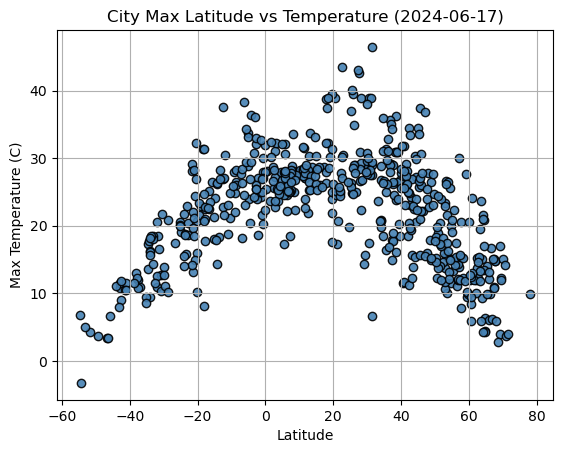

In [114]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="steelblue", alpha = 0.9, edgecolors="black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

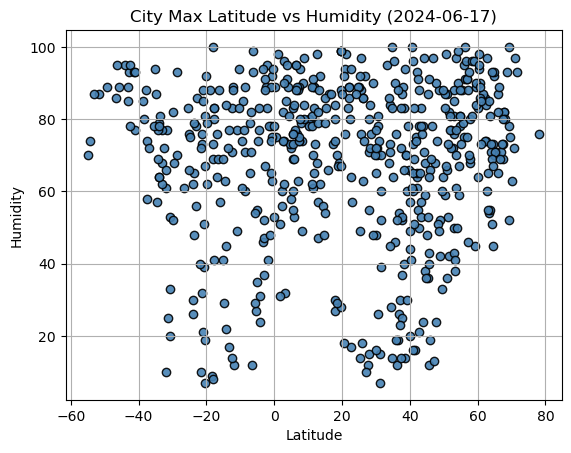

In [115]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="steelblue", alpha = 0.9, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

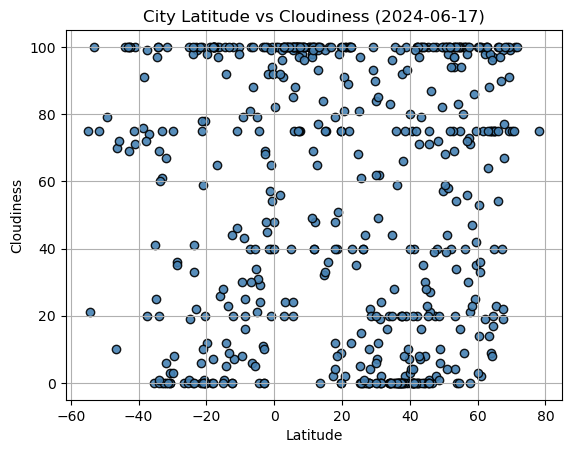

In [116]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="steelblue", alpha = 0.9, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

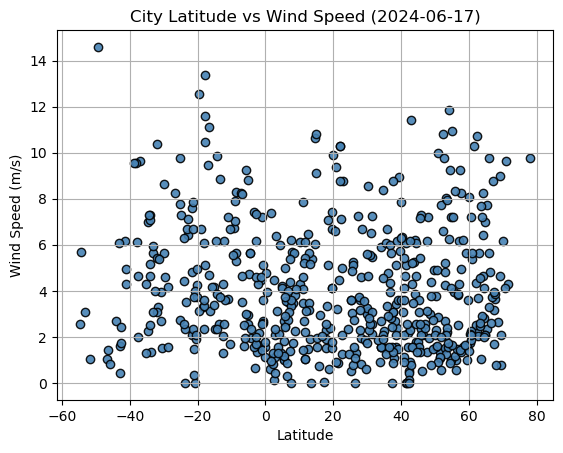

In [117]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="steelblue", alpha = 0.9, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [118]:
# Define a function to create Linear Regression plots


In [119]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,spearfish,44.4908,-103.8594,20.49,68,0,2.57,US,1724598609
2,cabo san lucas,22.8909,-109.9124,30.42,57,40,8.75,MX,1724598612
4,lata,40.1629,-8.3327,26.94,49,0,6.19,PT,1724598614
9,fortuna,40.5982,-124.1573,11.51,100,75,3.09,US,1724598585
10,kailua-kona,19.6406,-155.9956,23.98,99,75,4.12,US,1724598622


In [120]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,afaahiti,-17.7500,-149.2833,22.41,80,100,10.47,PF,1724598611
3,howard springs,-12.4970,131.0470,26.95,83,0,1.30,AU,1724598613
5,uturoa,-16.7333,-151.4333,25.20,76,100,11.12,PF,1724598613
6,grytviken,-54.2811,-36.5092,-3.27,74,21,5.69,GS,1724598343
7,sunbury,-37.5833,144.7333,11.92,74,20,4.63,AU,1724598326


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.40106690698655006


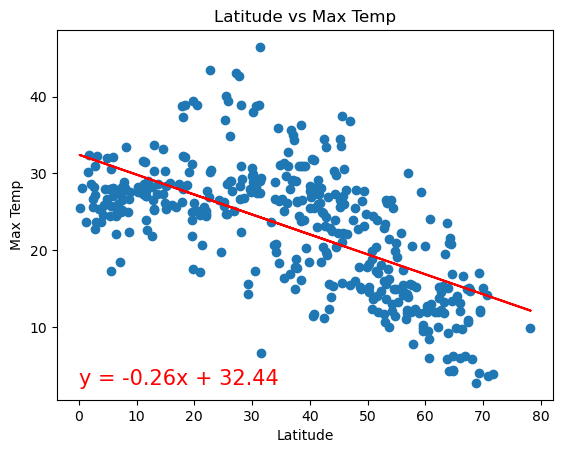

In [121]:
# Linear regression on Northern Hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,2.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Latitude vs Max Temp")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2 value is: 0.6719870596407526


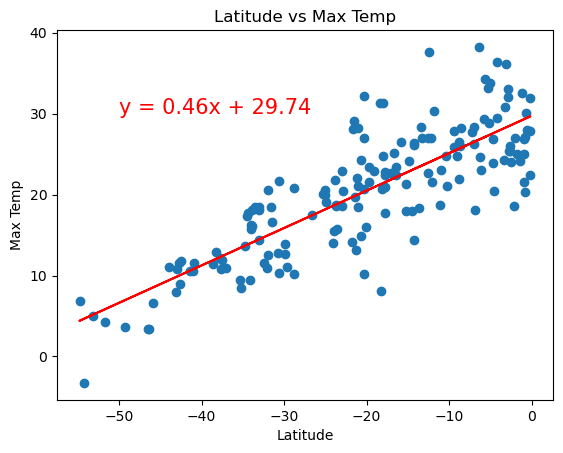

In [122]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Latitude vs Max Temp")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** These graphics suggest that max temp increases as the coordinates move closer to the Equator

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 7.582767376352772e-05


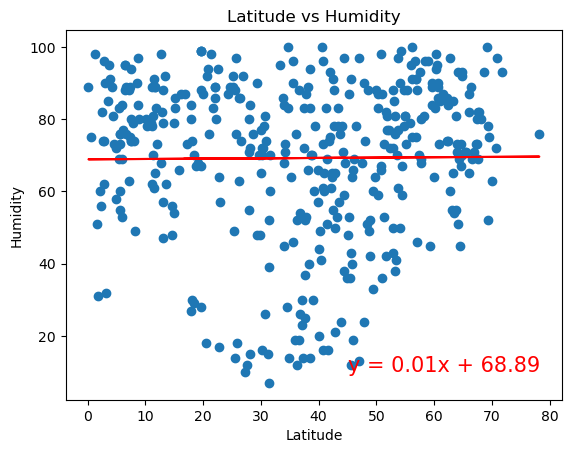

In [123]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2 value is: 0.02922688002319648


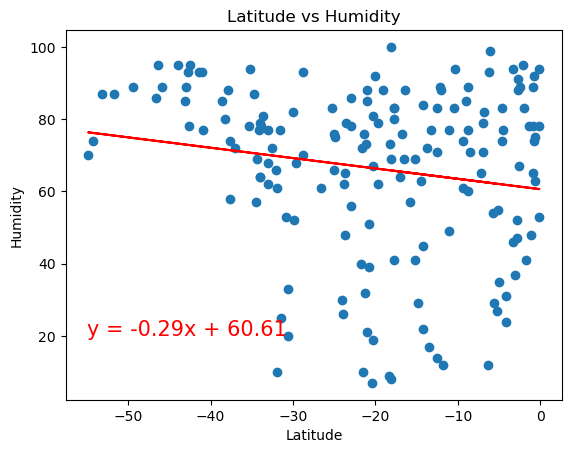

In [124]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** These graphics suggest that humidity only experiences a noticeable increase once you go south of the Equator

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.012786802523644543


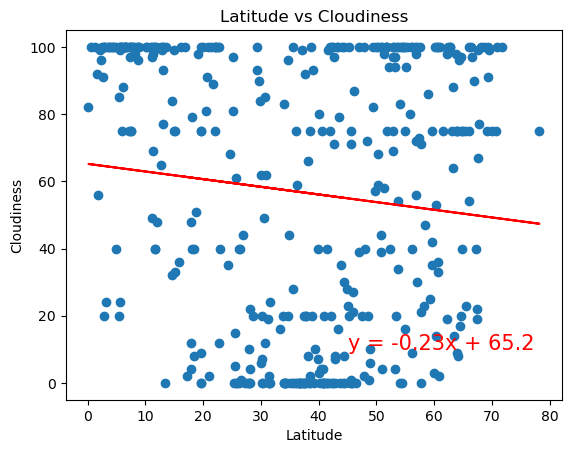

In [125]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2 value is: 0.00570443683912412


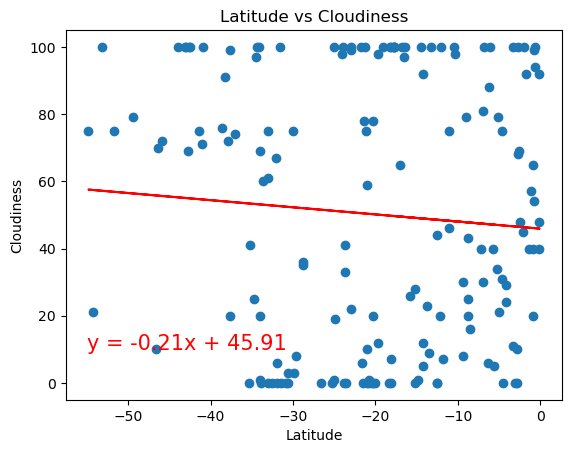

In [126]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** These graphics suggest that cloudiness only begins to noticeably dip once you reach south of the Equator

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.014983887275335818


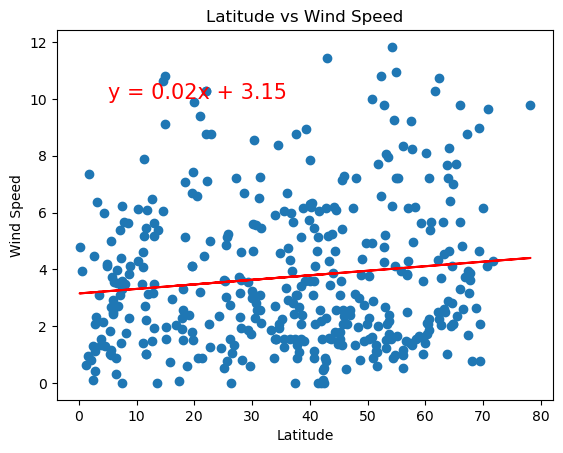

In [127]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

The r^2 value is: 0.0017534579617315554


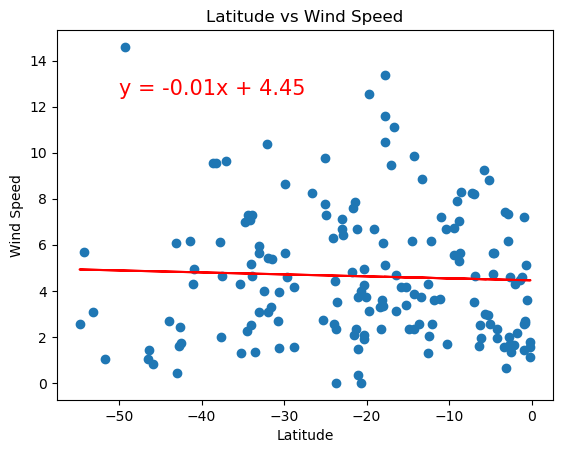

In [128]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,12.5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed")
print(f"The r^2 value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** These graphics suggest that wind speed only begins to slightly increase north of the Equator